##Student Placement Prediction using K-Nearest Neighbors(KNN)

##Importing libraries

In [ ]:
import numpy as np
import pandas as pd

##Uploading dataset

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving college_student_placement_dataset.csv to college_student_placement_dataset.csv


## Loading and Previewing the Dataset

In [ ]:
dataset=pd.read_csv("college_student_placement_dataset.csv")
print(dataset.shape)
print(dataset.head(5))

(10000, 10)
  College_ID   IQ  Prev_Sem_Result  CGPA  Academic_Performance  \
0    CLG0030  107             6.61  6.28                     8   
1    CLG0061   97             5.52  5.37                     8   
2    CLG0036  109             5.36  5.83                     9   
3    CLG0055  122             5.47  5.75                     6   
4    CLG0004   96             7.91  7.69                     7   

  Internship_Experience  Extra_Curricular_Score  Communication_Skills  \
0                    No                       8                     8   
1                    No                       7                     8   
2                    No                       3                     1   
3                   Yes                       1                     6   
4                    No                       8                    10   

   Projects_Completed Placement  
0                   4        No  
1                   0        No  
2                   1        No  
3               

##Checking for Missing Values

In [ ]:
dataset.isna().any()

,0
College_ID,False
IQ,False
Prev_Sem_Result,False
CGPA,False
Academic_Performance,False
Internship_Experience,False
Extra_Curricular_Score,False
Communication_Skills,False
Projects_Completed,False
Placement,False


##Encoding Categorical Variables Using LabelEncoder
###**LabelEncoder:**
LabelEncoder is a preprocessing tool from scikit-learn used to convert categorical text labels into numeric form (e.g., "Yes", "No" → 1, 0). This allows machine learning algorithms to work with categorical data.


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in dataset.select_dtypes(include="object"):
  dataset[col]=le.fit_transform(dataset[col])
target_encoder=LabelEncoder()
dataset['Placement']=target_encoder.fit_transform(dataset['Placement'])
dataset.head(5)

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,29,107,6.61,6.28,8,0,8,8,4,0
1,60,97,5.52,5.37,8,0,7,8,0,0
2,35,109,5.36,5.83,9,0,3,1,1,0
3,54,122,5.47,5.75,6,1,1,6,1,0
4,3,96,7.91,7.69,7,0,8,10,2,0


##Feature Selection is made by dropping unnecessary columns

In [ ]:
X=dataset.drop(['College_ID','Placement'],axis=1)
X

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed
0,107,6.61,6.28,8,0,8,8,4
1,97,5.52,5.37,8,0,7,8,0
2,109,5.36,5.83,9,0,3,1,1
3,122,5.47,5.75,6,1,1,6,1
4,96,7.91,7.69,7,0,8,10,2
...,...,...,...,...,...,...,...,...
9995,119,8.41,8.29,4,0,1,8,0
9996,70,9.25,9.34,7,0,0,7,2
9997,89,6.08,6.25,3,1,3,9,5
9998,107,8.77,8.92,3,0,7,5,1


##Targeting variable selection

In [ ]:
Y=dataset['Placement']
Y

,Placement
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,0
9997,0
9998,0


##Splitting the Dataset into Training and Testing Sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

## Feature Scaling Using StandardScaler
### **StandardScaler:**
StandardScaler is a preprocessing tool from scikit-learn that standardizes features by removing the mean and scaling to unit variance (i.e., mean = 0, standard deviation = 1). This helps improve the performance of many machine learning algorithms.


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(8000, 8)
(2000, 8)


##Evaluating K-Value with Error Rate Plot for K-Nearest Neighbors
###**Mean Error:**
Mean error is the average rate of incorrect predictions made by a model. It is calculated as the proportion of test samples where the predicted label does not match the true label:

$$
\text{Mean Error} = \frac{\text{Number of incorrect predictions}}{\text{Total number of predictions}}
$$

In other words, it’s the complement of accuracy (i.e., `Mean Error = 1 - Accuracy`).


Text(0, 0.5, 'Mean error')

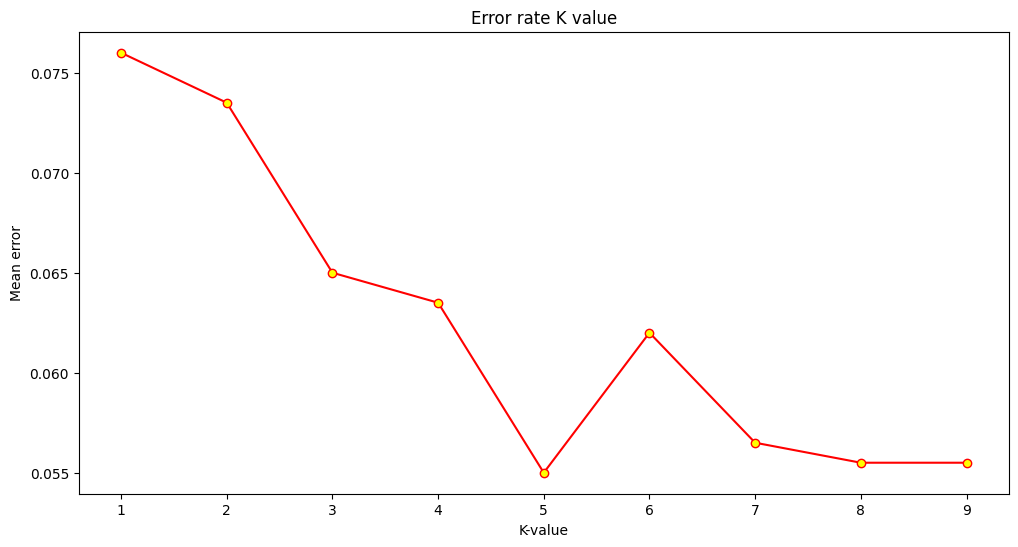

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

error=[]
for i in range(1,10):
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train,Y_train)
  pred_i=model.predict(X_test)
  error.append(np.mean(pred_i!= Y_test))
plt.figure(figsize=(12,6))
plt.plot(range(1,10),error,marker="o",color='red',markerfacecolor='yellow')
plt.title("Error rate K value")
plt.xlabel("K-value")
plt.ylabel("Mean error")

##Training the K-Nearest Neighbors (KNN) Classifier
###**K-Nearest Neighbors (KNN) Classifier (Definition):**
KNN is a simple, intuitive supervised machine learning algorithm used for classification and regression. It classifies a data point based on how its neighbors are classified—by looking at the ‘k’ closest training examples in the feature space and assigning the most common class among them. It relies on distance metrics like Euclidean or Minkowski to measure similarity.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
model.fit(X_train,Y_train)

KNeighborsClassifier()

##Predicting Test Outcomes Using Trained KNN Model

In [ ]:
y_pred=model.predict(X_test)

##Evaluating Model Performance: Confusion Matrix and Accuracy Score
###**Confusion Matrix:**
A confusion matrix is a table that summarizes the performance of a classification model by showing the counts of true positive, true negative, false positive, and false negative predictions. It helps to understand how well the model is distinguishing between classes.

|                     | Predicted Positive  | Predicted Negative  |
| ------------------- | ------------------- | ------------------- |
| **Actual Positive** | True Positive (TP)  | False Negative (FN) |
| **Actual Negative** | False Positive (FP) | True Negative (TN)  |

**Accuracy Score:**
Accuracy is the proportion of total correct predictions out of all predictions made. It measures how often the classifier is correct overall. It’s calculated as:

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$






In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Confusion Matrix")
matrix_predicted=confusion_matrix(y_pred,Y_test)
print(matrix_predicted)
print("Accuracy of the K_nearest_neighbor model : {0}".format(accuracy_score(y_pred,Y_test)*100))

Confusion Matrix
[[1645   69]
 [  41  245]]
Accuracy of the K_nearest_neighbor model : 94.5


##Predicting Placement for New Student Input

In [ ]:
print("\nEnter Student Details:")
IQ = float(input("IQ: "))
Prev_Sem_Result = float(input("Previous Semester Result: "))
CGPA = float(input("CGPA: "))
Academic_Performance = int(input("Academic Performance Score: "))
Internship_Experience = int(input("Internship Experience (0 = No, 1 = Yes): "))
Extra_Curricular_Score = int(input("Extra Curricular Score: "))
Communication_Skills = int(input("Communication Skills Score: "))
Projects_Completed = int(input("Number of Projects Completed: "))
user_input = [[IQ, Prev_Sem_Result, CGPA, Academic_Performance, Internship_Experience,
               Extra_Curricular_Score, Communication_Skills, Projects_Completed]]
user_input_df = pd.DataFrame(user_input, columns=X.columns)
user_input_scaled = sc.transform(user_input_df)
placement_prediction = model.predict(user_input_scaled)
if placement_prediction[0] == 1:
    print("The student is likely to be PLACED.")
else:
    print("The student is NOT likely to be placed.")


Enter Student Details:
IQ: 96
Previous Semester Result: 7.91
CGPA: 7.69
Academic Performance Score: 7
Internship Experience (0 = No, 1 = Yes): 0
Extra Curricular Score: 8
Communication Skills Score: 10
Number of Projects Completed: 2
The student is NOT likely to be placed.
